In [2]:
%load_ext autoreload
%autoreload 2

import torch
import experiments.multiclass_classification as exp
from experiments import mnist

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [4]:
batch_size = 128
# LeNet with ReLu
layers = [
    ("conv", (1, 6, 5)),
    ("relu", ()),
    ("pool", 2),
    ("conv", (6, 16, 5)),
    ("relu", ()),
    ("pool", 2),
    ("flatten", ()),
    ("fc", (16 * 4 * 4, 120)),
    ("relu", ()),
    ("fc", (120, 84)),
    ("relu", ()),
    ("fc", (84, 10)),
    ("logsoftmax", ())
]

In [5]:
torch.manual_seed(42)

trainloader = mnist.fashion_trainloader(batch_size)
testloader = mnist.fashion_testloader(batch_size)
corrupted_testloader = mnist.corrupted_fashion_testloader(batch_size)

In [11]:
torch.manual_seed(42)
pp, pp_losses = exp.point_predictor(layers, 15, trainloader, batch_size, device)

Generated model: Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=256, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
  (12): LogSoftmax(dim=1)
)
44426 trainable parameters
Epoch 0: NLL loss 0.014485593885183334
Epoch 1: NLL loss 0.006490576546639204
Epoch 2: NLL loss 0.005458095110952854
Epoch 3: NLL loss 0.0050111692398786545
Epoch 4: NLL loss 0.00467305351048708
Epoch 5: NLL loss 0.004406867083162069
Epoch 6: NLL loss 0.004205622244626284
Epoch 7: NLL loss 0.0040304698050022125
Epoch 8: NLL loss 0.003864133032038808
Epoch 9: NLL l

In [12]:
torch.manual_seed(42)
swag_config = {
    "update_every_batches": len(trainloader) // 4,
    "deviation_samples": 20,
    "start_epoch": 10,
    "max_lr": 0.01,
    "min_lr": 0.005,
}
swag, swag_losses = exp.swag(layers, 15, trainloader, batch_size, swag_config, device)

Generated model: Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=256, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
  (12): LogSoftmax(dim=1)
)
44426 trainable parameters
Epoch 0: NLL loss 0.014485567808151245
Epoch 1: NLL loss 0.006490510888397694
Epoch 2: NLL loss 0.005458505358546972
Epoch 3: NLL loss 0.0050122663378715515
Epoch 4: NLL loss 0.004674102645367384
Epoch 5: NLL loss 0.004408230539411306
Epoch 6: NLL loss 0.0042082518339157104
Epoch 7: NLL loss 0.004033201839774847
Epoch 8: NLL loss 0.0038668233901262283
Epoch 9: NLL

In [13]:
torch.manual_seed(42)
ensemble, ensemble_losses = exp.ensemble(5, layers, 15, trainloader, batch_size, device)

Generated model: Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=256, out_features=120, bias=True)
  (8): ReLU()
  (9): Linear(in_features=120, out_features=84, bias=True)
  (10): ReLU()
  (11): Linear(in_features=84, out_features=10, bias=True)
  (12): LogSoftmax(dim=1)
)
44426 trainable parameters
Generated model: Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_di

In [26]:
from training.bbb import GaussianPrior, BBBModel

torch.manual_seed(42)
bbb_prior = GaussianPrior(0, 1)
bbb = BBBModel(bbb_prior, "activations", layers)
bbb.train(2, torch.nn.NLLLoss(reduction="sum"), torch.optim.SGD(bbb.parameters(), lr=0.01), trainloader, batch_size, device)
#bbb, bbb_loss = exp.bbb(bbb_prior, "activations", 5, 1, layers, 15, trainloader, batch_size, device)

[autoreload of training.bbb failed: Traceback (most recent call last):
  File "C:\Users\flose\.conda\envs\ml\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\flose\.conda\envs\ml\lib\site-packages\IPython\extensions\autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "C:\Users\flose\.conda\envs\ml\lib\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "C:\Users\flose\.conda\envs\ml\lib\site-packages\IPython\extensions\autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "C:\Users\flose\.conda\envs\ml\lib\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "C:\Users\flose\.conda\envs\ml\lib\site-packages\IPython\extensions\autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new, name))
ValueError: __init_

Generated model: Sequential(
  (0): BBBConvolution()
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): BBBConvolution()
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): BBBLinear()
  (8): ReLU()
  (9): BBBLinear()
  (10): ReLU()
  (11): BBBLinear()
  (12): LogSoftmax(dim=1)
)
88852 trainable parameters
Epoch 0: loss 2.695307970046997
Epoch 1: loss 2.4192728996276855
Final loss 2.4192728996276855


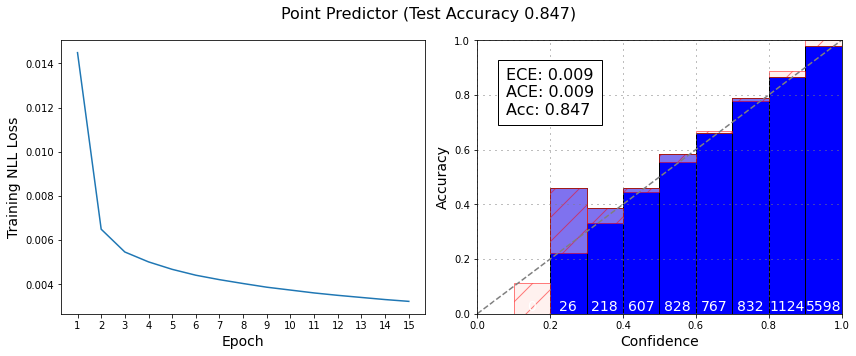

In [15]:
exp.eval_model("Point Predictor", pp, pp_losses, 1, testloader, device).savefig("figures/fmnist_pp_15e.png")

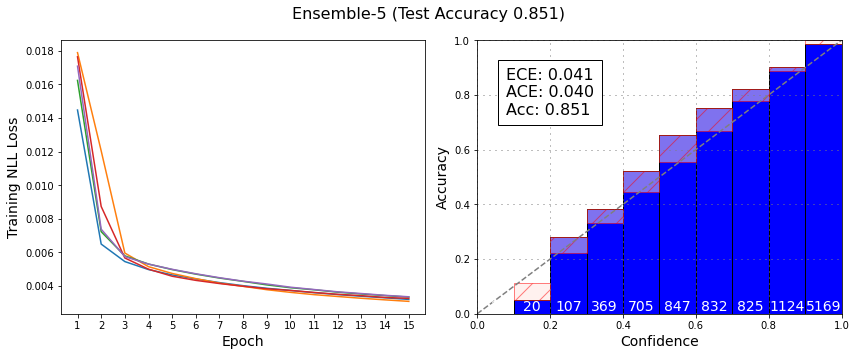

In [16]:
exp.eval_model("Ensemble-5", ensemble, ensemble_losses, 5, testloader, device).savefig("figures/fmnist_ensemble5_15e.png")

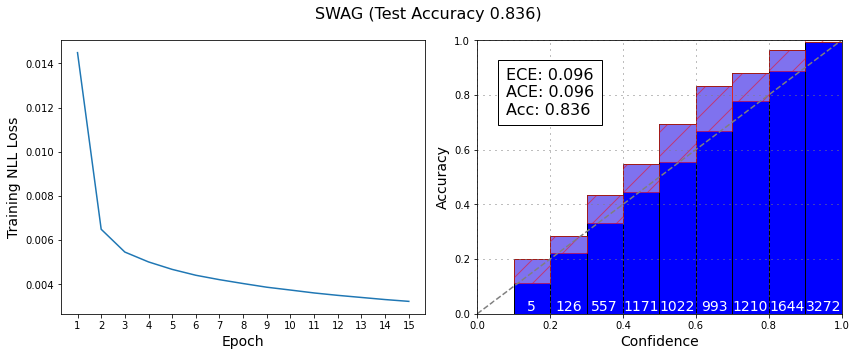

In [20]:
exp.eval_model("SWAG", swag, swag_losses, 100, testloader, device).savefig("figures/fmnist_swag20k_15e.png")

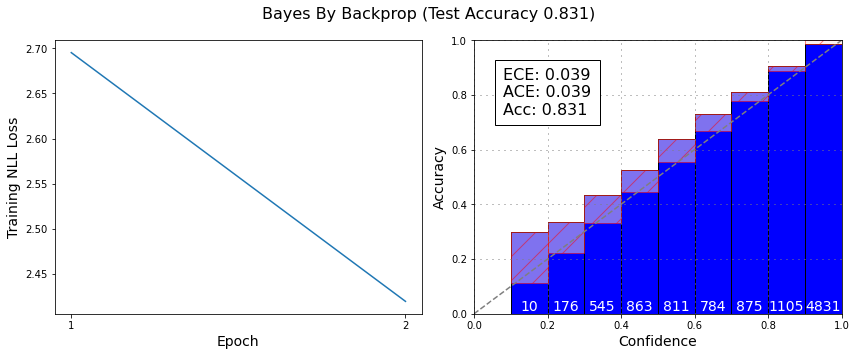

In [28]:
exp.eval_model("Bayes By Backprop", lambda x, s: bbb.infer(x, s), bbb.all_losses(), 100, testloader, device).savefig("figures/fmnist_bbb_15e.png")

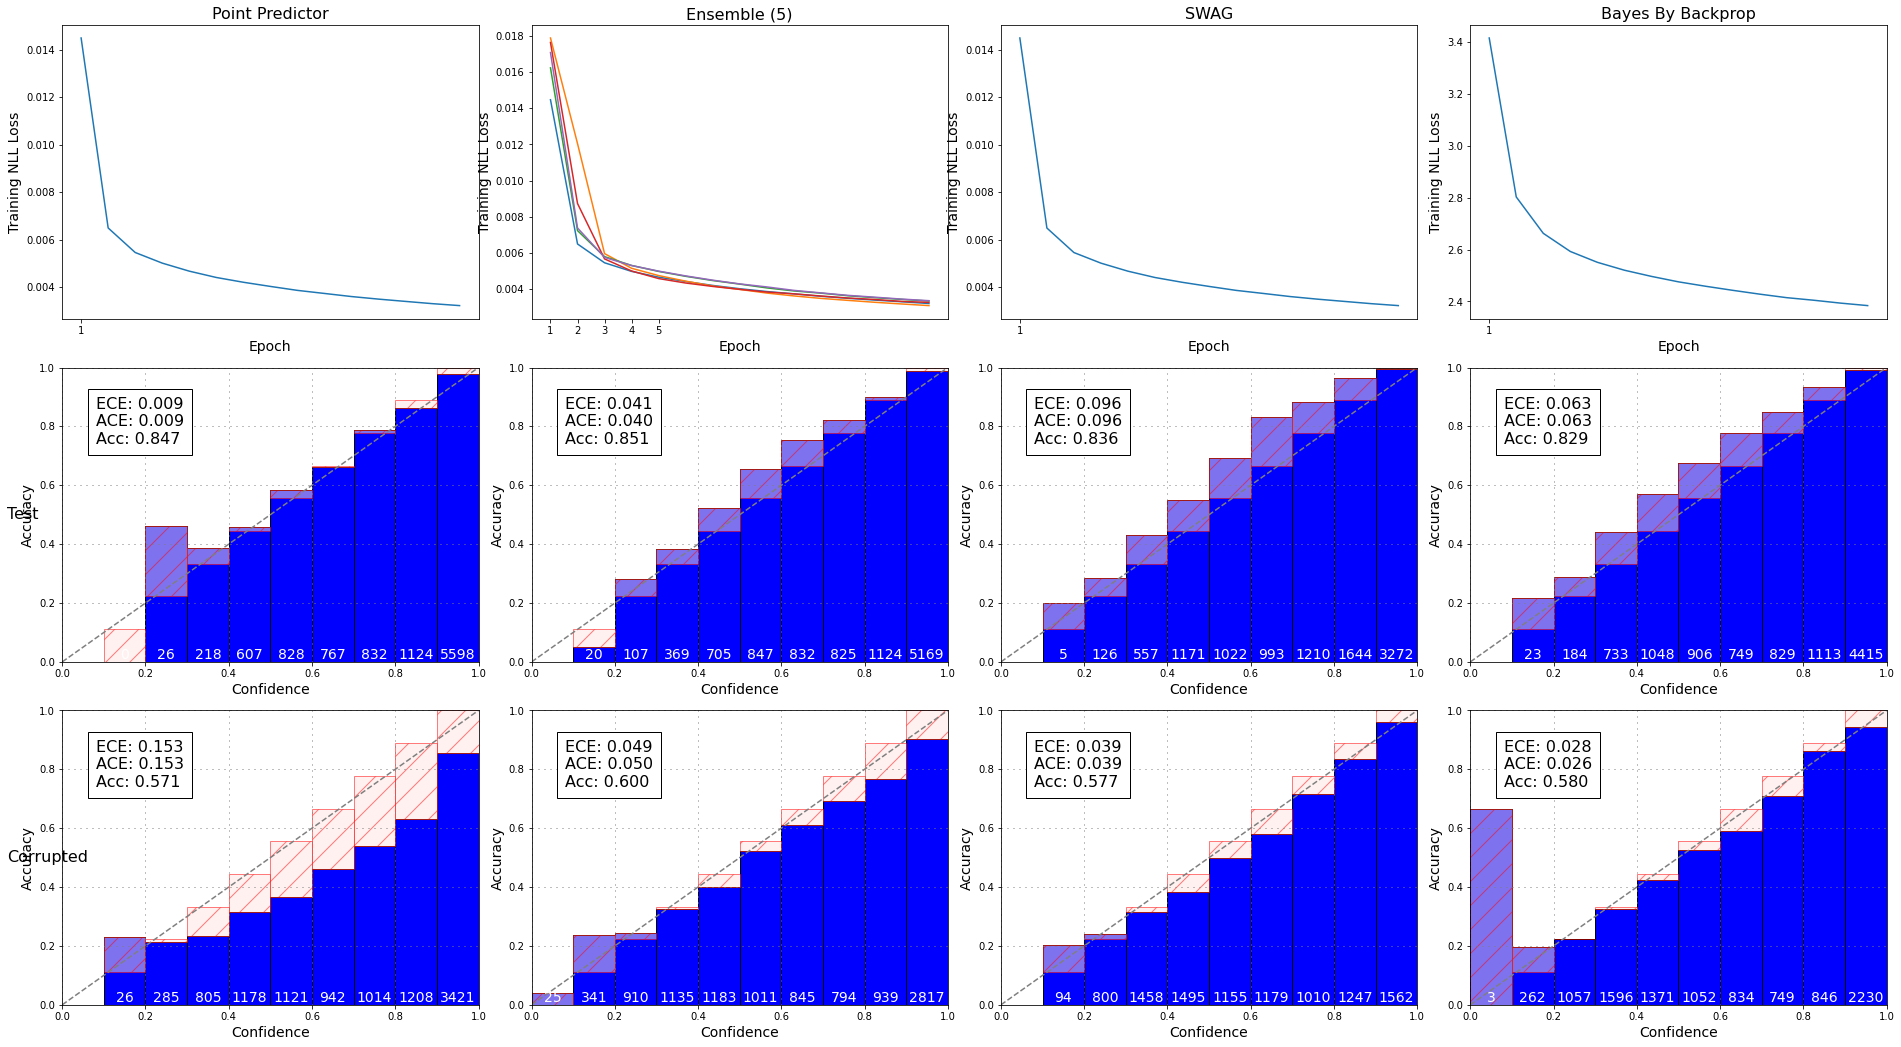

In [22]:
exp.eval_multiple(
    [
        ("Point Predictor", pp, pp_losses, [], 1),
        ("Ensemble (5)", ensemble, ensemble_losses, [], 5),
        ("SWAG", swag, swag_losses, [], 100),
        ("Bayes By Backprop", bbb, bbb_loss, [], 100)
    ],
    [
        ("Test", testloader),
        ("Corrupted", corrupted_testloader)
    ],
    device
).savefig("figures/mnist_all.png")